In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
data.shape

(13994, 30)

In [5]:
data.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [6]:
data=data.drop(['player_id','name','country'], axis=1)
#player_id and name is not needed for data analysis

In [7]:
data.shape

(13994, 27)

# Checking Null values

In [8]:
data.isnull().sum()

age                            0
gender                        19
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [9]:
df=data.dropna(subset=['gender','weight','ball_controlling_skills','jumping_skills','penalties_conversion_rate','mental_strength','shot_accuracy','strong_foot','strong_foot','behaviour_rating','matches_played','fitness_rating','coaching','years_of_experience',])

In [10]:
df.isnull().sum()

age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [11]:
#Dropping the null rows results in deletion of nearly 3000 rows. This is not optimal thus another method needs to be adopted

In [12]:
data.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [13]:
for column in ['gender', 'strong_foot','coaching']:
    data[column].fillna(data[column].mode()[0], inplace=True)
    #Using mode to replace null values in categorical columns

In [14]:
data.isnull().sum()

age                            0
gender                         0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [15]:
data = data.astype({"weight": 'str'})
#Changing datatype of 'weight' column as it contains string elements

In [16]:
data.dtypes

age                            int64
gender                        object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
d

In [17]:
data['weight'] = data['weight'].map(lambda x: x.rstrip('lbs'))
#Removing string elemenst from 'weight' column

In [18]:
data.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,6'2,176,77.0,58.0,47.0,59.0,41.0,73.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,5'10,148,54.0,69.0,70.0,62.0,53.0,43.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,6'2,172,34.0,43.0,45.0,69.0,49.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,5'11,165,79.0,73.0,76.0,86.0,81.0,80.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,5'8,158,47.0,61.0,74.0,57.0,49.0,35.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [19]:
data = data.astype({"weight": 'float64'})
#'weight' collumn changed back to float for better analysis

In [20]:
data.dtypes

age                            int64
gender                        object
height                        object
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
d

In [21]:
data=data.drop(['height'], axis=1)
#Dropped height column as it contained (') character

In [22]:
data.head()

,age,gender,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,176.0,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,148.0,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,172.0,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,165.0,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,158.0,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [23]:
data.isnull().sum()

age                            0
gender                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [24]:
for i in data.columns[data.isnull().any(axis=0)]:
    data[i].fillna(data[i].mean(),inplace=True)
    #Replacing missing values in numerical columns with mean

In [25]:
data.isnull().sum()

age                          0
gender                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

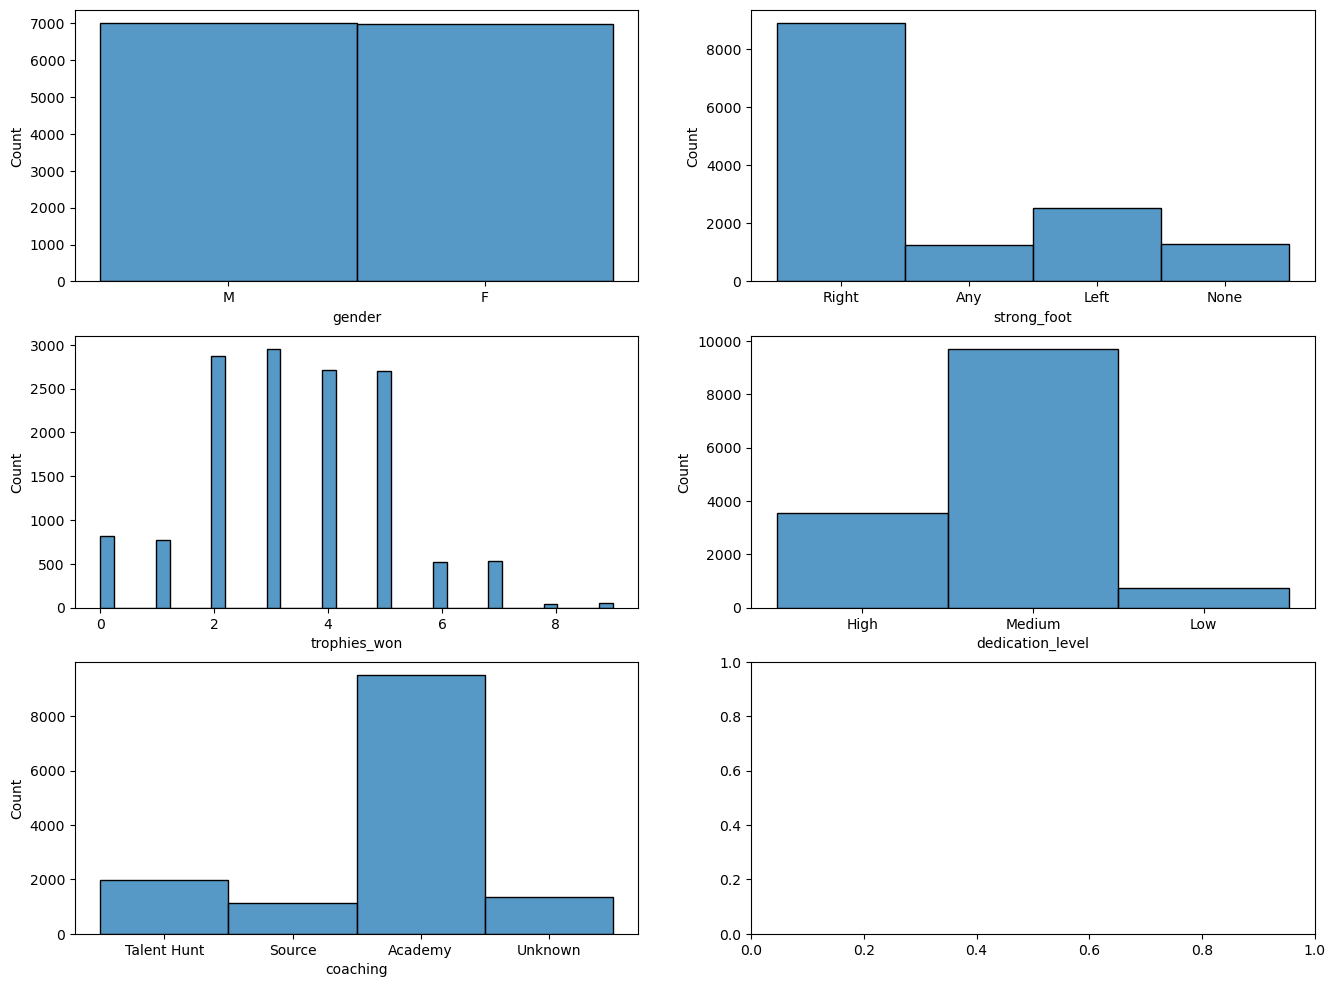

In [27]:
fig, axes = plt.subplots(3,2, figsize = (16,12))
sns.histplot(data['gender'], ax = axes[0,0])
sns.histplot(data['strong_foot'], ax = axes[0,1])
sns.histplot(data['trophies_won'], ax = axes[1,0])
sns.histplot(data['dedication_level'], ax = axes[1,1])
sns.histplot(data['coaching'], ax = axes[2,0])
plt.show()

C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


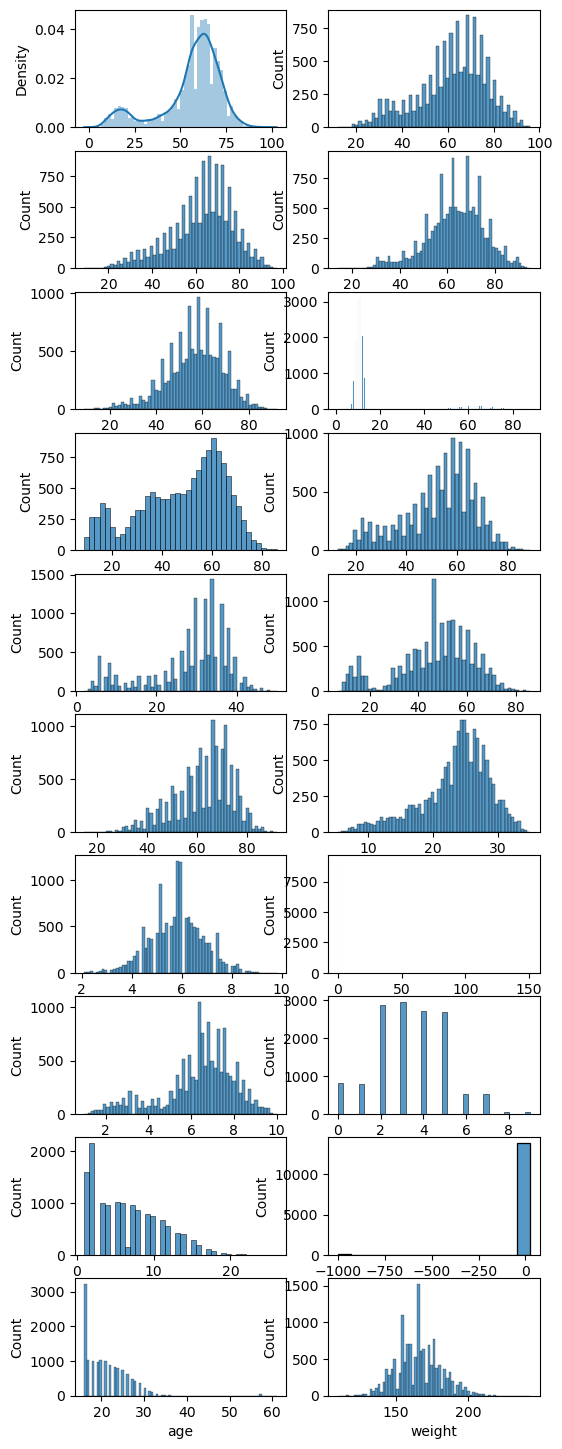

In [43]:
fig, axes = plt.subplots(10,2, figsize = (6,18))
sns.distplot(data['ball_controlling_skills'], ax = axes[0,0])
sns.histplot(data['body_reflexes'], ax = axes[0,1])
sns.histplot(data['body_balance'], ax = axes[1,0])
sns.histplot(data['jumping_skills'], ax = axes[1,1])
sns.histplot(data['mental_strength'], ax = axes[2,0])
sns.histplot(data['goalkeeping_skills'], ax = axes[2,1])
sns.histplot(data['defending_skills'], ax = axes[3,0])
sns.histplot(data['passing_skills'], ax = axes[3,1])
sns.histplot(data['dribbling_skills'], ax = axes[4,0])
sns.histplot(data['shot_accuracy'], ax = axes[4,1])
sns.histplot(data['body_strength_stamina'], ax = axes[5,0])
sns.histplot(data['max_running_speed'], ax = axes[5,1])
sns.histplot(data['behaviour_rating'], ax = axes[6,0])
sns.histplot(data['matches_played'], ax = axes[6,1])
sns.histplot(data['fitness_rating'], ax = axes[7,0])
sns.histplot(data['trophies_won'], ax = axes[7,1])
sns.histplot(data['years_of_experience'], ax = axes[8,0])
sns.histplot(data['no_of_disqualifications'], ax = axes[8,1])
sns.histplot(data['age'], ax = axes[9,0])
sns.histplot(data['weight'], ax = axes[9,1])
plt.show()

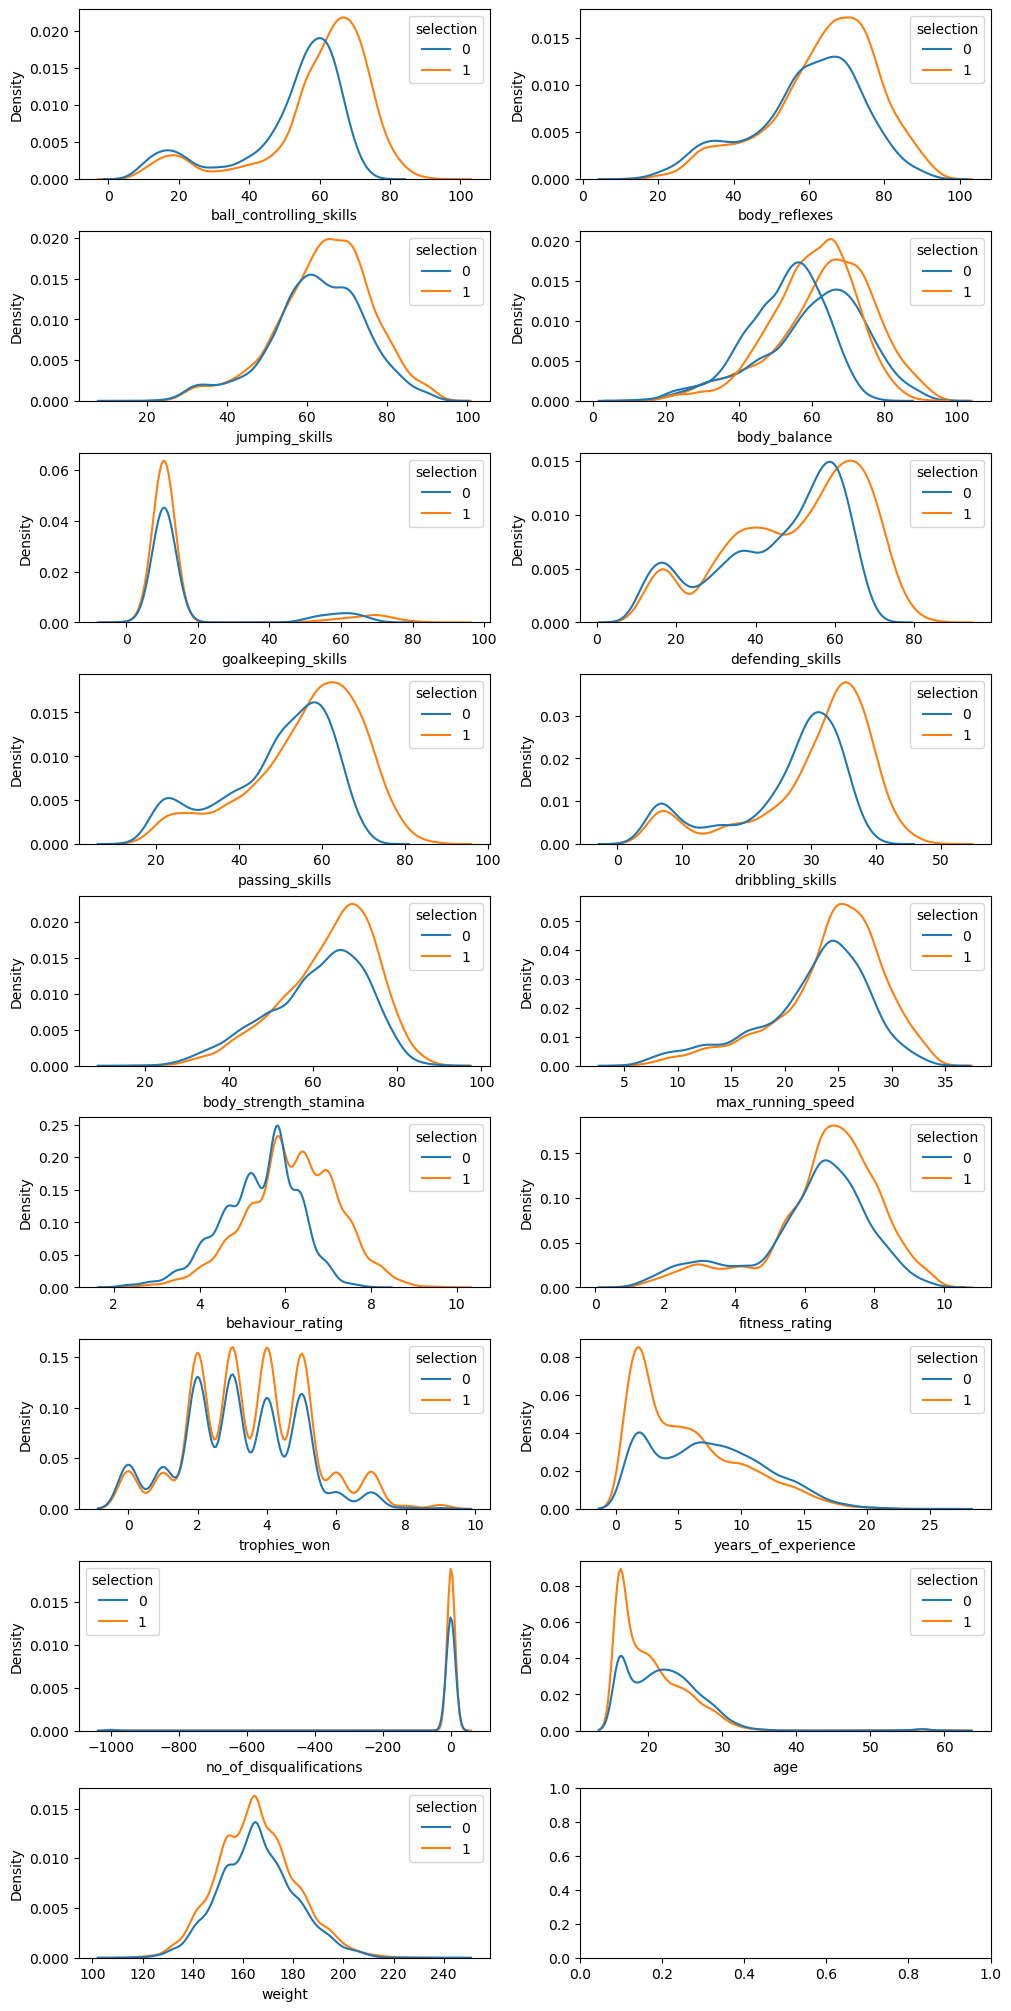

In [45]:
fig, axes = plt.subplots(9,2, constrained_layout = True, figsize = (10,20))

sns.kdeplot(data = data, x = data['ball_controlling_skills'], hue = 'selection', ax = axes[0,0])
sns.kdeplot(data = data, x = data['body_reflexes'], hue = 'selection', ax = axes[0,1])
sns.kdeplot(data = data, x = data['body_balance'], hue = 'selection', ax = axes[1,1])
sns.kdeplot(data = data, x = data['jumping_skills'], hue = 'selection', ax = axes[1,0])
sns.kdeplot(data = data, x = data['mental_strength'], hue = 'selection', ax = axes[1,1])
sns.kdeplot(data = data, x = data['goalkeeping_skills'], hue = 'selection', ax = axes[2,0])
sns.kdeplot(data = data, x = data['defending_skills'], hue = 'selection', ax = axes[2,1])
sns.kdeplot(data = data, x = data['passing_skills'], hue = 'selection', ax = axes[3,0])
sns.kdeplot(data = data, x = data['dribbling_skills'], hue = 'selection', ax = axes[3,1])
sns.kdeplot(data = data, x = data['body_strength_stamina'], hue = 'selection', ax = axes[4,0])
sns.kdeplot(data = data, x = data['max_running_speed'], hue = 'selection', ax = axes[4,1])
sns.kdeplot(data = data, x = data['behaviour_rating'], hue = 'selection', ax = axes[5,0])
sns.kdeplot(data = data, x = data['fitness_rating'], hue = 'selection', ax = axes[5,1])
sns.kdeplot(data = data, x = data['trophies_won'], hue = 'selection', ax = axes[6,0])
sns.kdeplot(data = data, x = data['years_of_experience'], hue = 'selection', ax = axes[6,1])
sns.kdeplot(data = data, x = data['no_of_disqualifications'], hue = 'selection', ax = axes[7,0])
sns.kdeplot(data = data, x = data['age'], hue = 'selection', ax = axes[7,1])
sns.kdeplot(data = data, x = data['weight'], hue = 'selection', ax = axes[8,0])
plt.show()

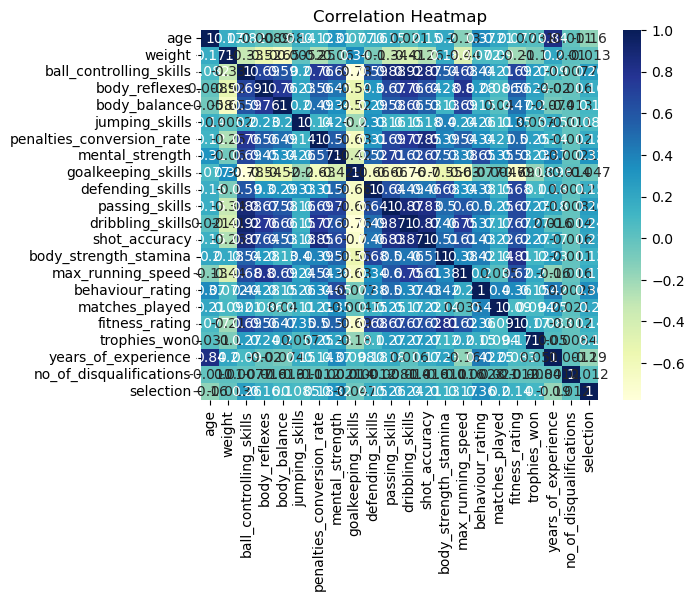

In [41]:
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

# Label Encoder

In [42]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['strong_foot']=le.fit_transform(data['strong_foot'])
data['dedication_level']=le.fit_transform(data['dedication_level'])
data['coaching']=le.fit_transform(data['coaching'])
data

,age,gender,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,176.0,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,3,7.700000,3.908463,8.100000,2.0,0,2,8.0,0.0,1
1,18,1,148.0,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,0,5.300000,0.000000,6.405482,3.0,2,1,3.0,0.0,0
2,16,0,172.0,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,1,4.700000,0.000000,6.600000,5.0,1,0,2.0,0.0,1
3,27,1,165.0,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,3,8.600000,113.000000,8.600000,6.0,2,0,13.0,16.0,1
4,19,0,158.0,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,3,5.822068,0.000000,5.700000,5.0,2,0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,20,1,161.0,60.0,48.0,62.0,60.0,40.0,61.0,10.0,...,3,6.000000,3.908463,7.600000,2.0,2,0,6.0,0.0,1
13990,18,0,165.0,53.0,68.0,59.0,73.0,24.0,55.0,11.0,...,3,5.300000,0.000000,5.600000,3.0,2,0,4.0,0.0,0
13991,17,1,172.0,56.0,73.0,62.0,50.0,47.0,64.0,10.0,...,1,5.700000,0.000000,7.700000,3.0,1,2,2.0,0.0,1
13992,20,0,150.0,71.0,69.0,70.0,51.0,56.0,59.0,9.0,...,1,6.800000,1.000000,5.800000,4.0,2,0,6.0,0.0,1


In [46]:
data.dtypes

age                            int64
gender                         int32
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                    int32
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level               int32
coaching                       int32
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
dtype: object

In [48]:
x = data[['age', 'gender', 'weight','ball_controlling_skills','body_reflexes', 'body_balance','jumping_skills','penalties_conversion_rate','mental_strength','goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'strong_foot', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level', 'coaching', 'years_of_experience', 'no_of_disqualifications']]
y = data['selection']

# Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()
x_s=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_s

,age,gender,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,0.155556,1.0,0.496241,0.800000,0.547619,0.431818,0.555556,0.400000,0.771084,0.137931,...,0.641892,1.000000,0.727273,0.025884,0.788889,0.222222,0.0,0.666667,0.28,0.975586
1,0.044444,1.0,0.285714,0.544444,0.678571,0.693182,0.592593,0.541176,0.409639,0.103448,...,0.581081,0.000000,0.415584,0.000000,0.600609,0.333333,1.0,0.333333,0.08,0.975586
2,0.000000,0.0,0.466165,0.322222,0.369048,0.409091,0.679012,0.494118,0.433735,0.103448,...,0.601351,0.333333,0.337662,0.000000,0.622222,0.555556,0.5,0.000000,0.04,0.975586
3,0.244444,1.0,0.413534,0.822222,0.726190,0.761364,0.888889,0.870588,0.855422,0.022989,...,0.533784,1.000000,0.844156,0.748344,0.844444,0.666667,1.0,0.000000,0.48,0.991211
4,0.066667,0.0,0.360902,0.466667,0.583333,0.738636,0.530864,0.494118,0.313253,0.091954,...,0.608108,1.000000,0.483385,0.000000,0.522222,0.555556,1.0,0.000000,0.12,0.975586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,0.088889,1.0,0.383459,0.611111,0.428571,0.602273,0.567901,0.388235,0.626506,0.103448,...,0.456081,1.000000,0.506494,0.025884,0.733333,0.222222,1.0,0.000000,0.20,0.975586
13990,0.044444,0.0,0.413534,0.533333,0.666667,0.568182,0.728395,0.200000,0.554217,0.114943,...,0.658784,1.000000,0.415584,0.000000,0.511111,0.333333,1.0,0.000000,0.12,0.975586
13991,0.022222,1.0,0.466165,0.566667,0.726190,0.602273,0.444444,0.470588,0.662651,0.103448,...,0.780405,0.333333,0.467532,0.000000,0.744444,0.333333,0.5,0.666667,0.04,0.975586
13992,0.088889,0.0,0.300752,0.733333,0.678571,0.693182,0.456790,0.576471,0.602410,0.091954,...,0.679054,0.333333,0.610390,0.006623,0.533333,0.444444,1.0,0.000000,0.20,0.975586


C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aswin Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

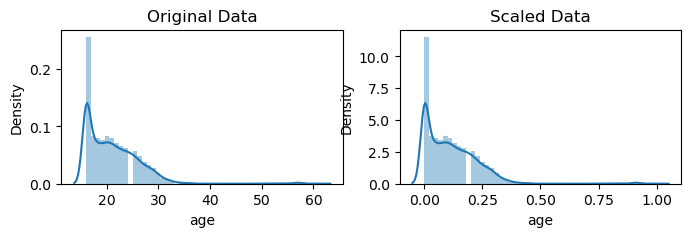

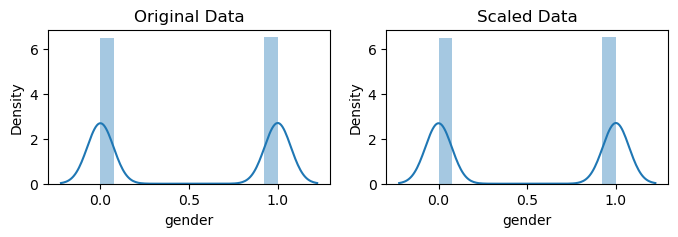

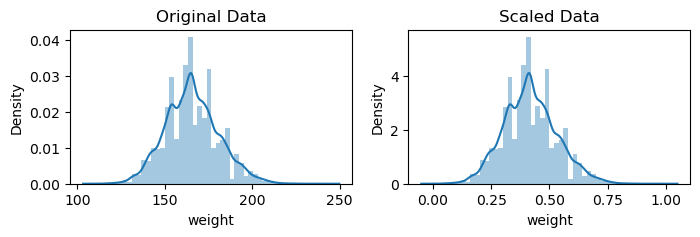

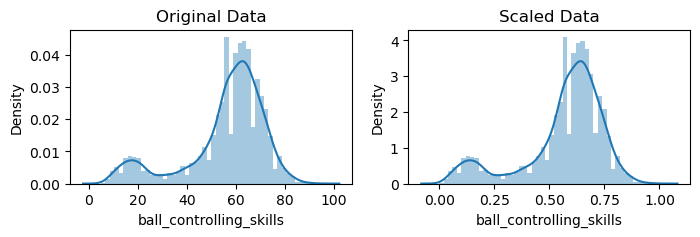

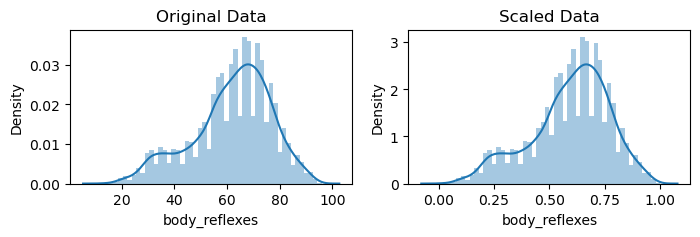

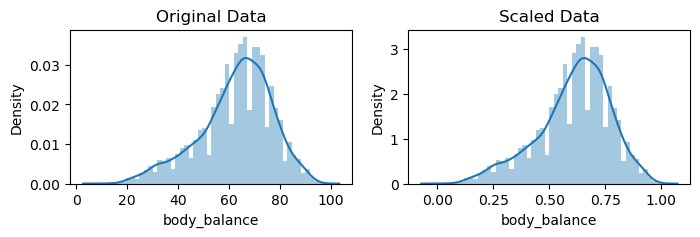

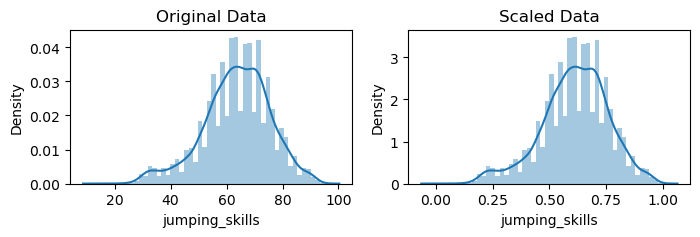

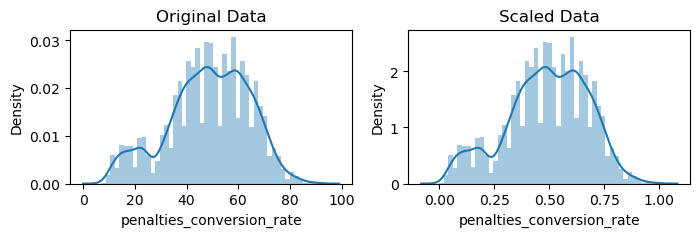

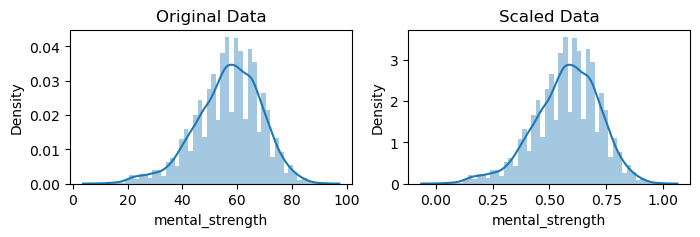

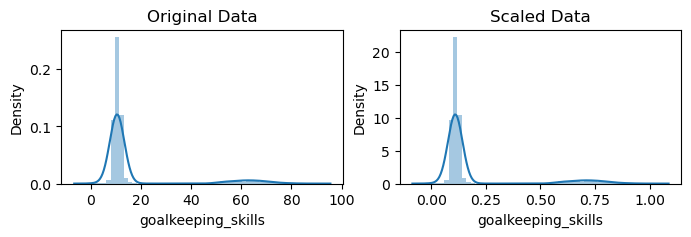

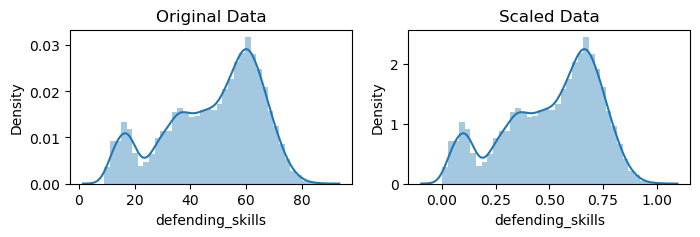

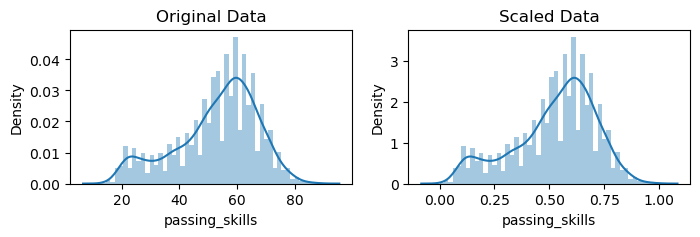

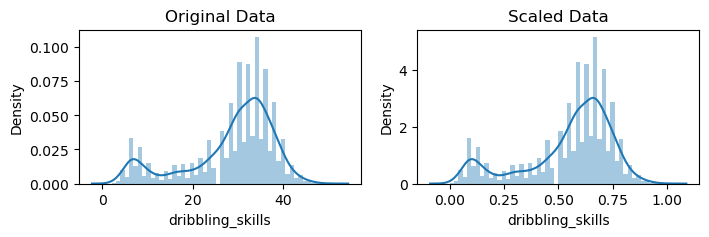

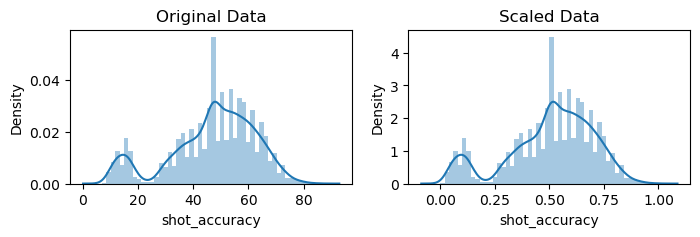

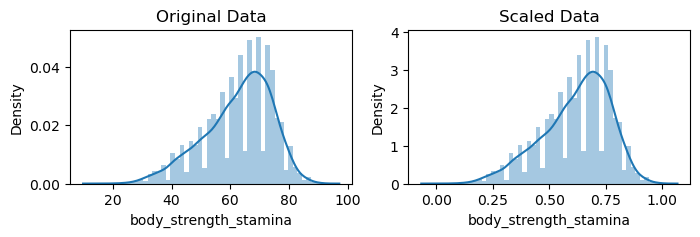

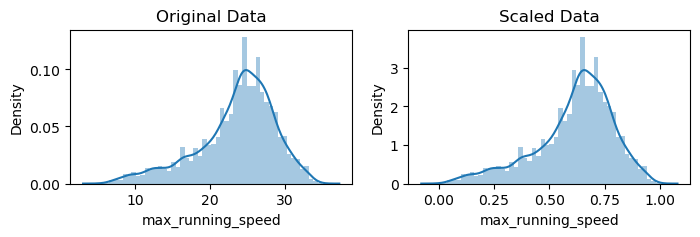

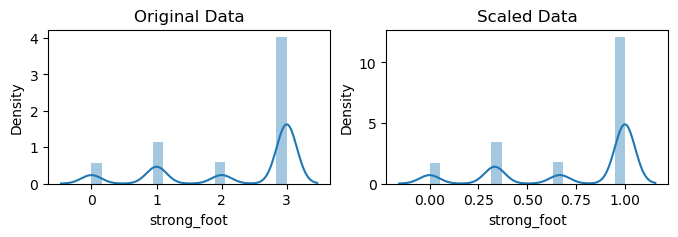

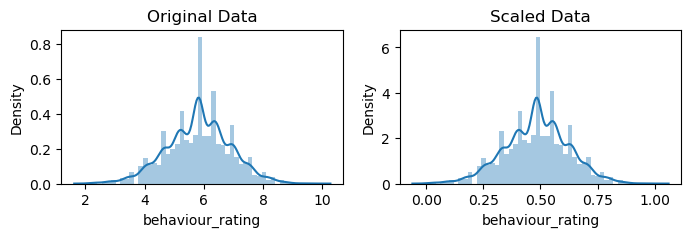

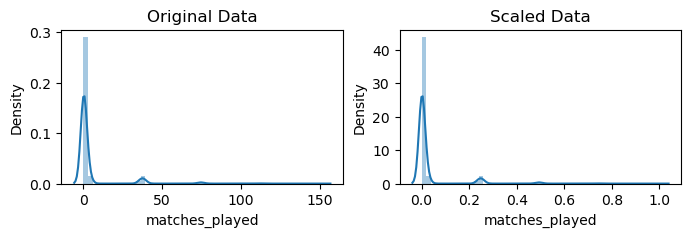

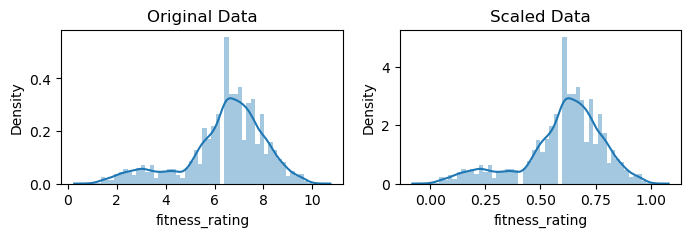

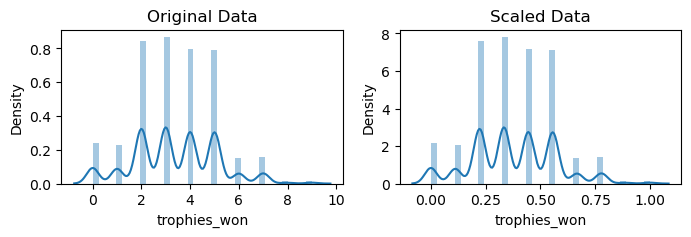

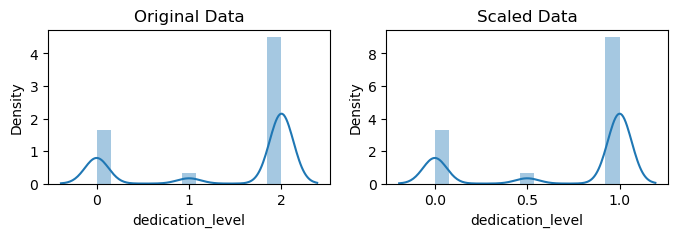

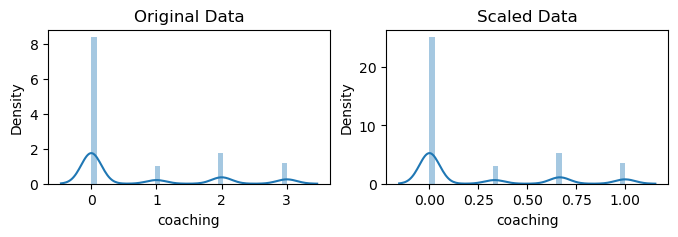

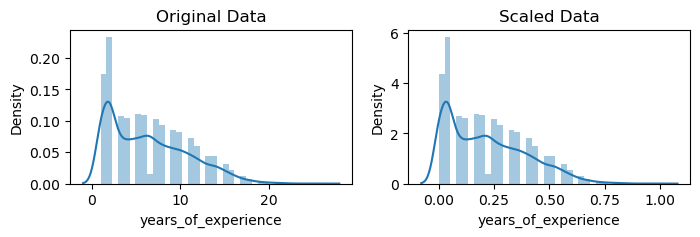

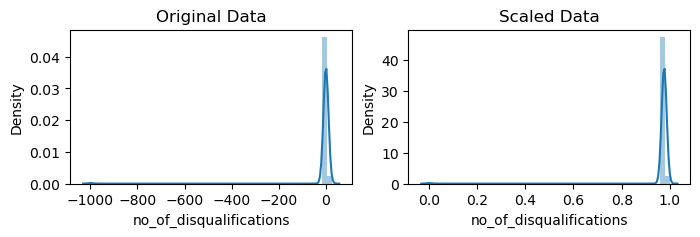

In [73]:
for i in x:
    fig, ax=plt.subplots(1,2, figsize = (8,2))
    sns.distplot(x[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(x_s[i],ax=ax[1])
    ax[1].set_title("Scaled Data")

In [53]:
from sklearn.model_selection import train_test_split
x_strain, x_stest, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)
#Splitting into testing and training data

# SVM

In [54]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(x_strain,y_train)

SVC(kernel='linear')

In [55]:
y_pred_svm=svmclf.predict(x_stest)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.773490532332976


In [58]:
print(confusion_matrix(y_test,y_pred_svm))

[[ 930  356]
 [ 278 1235]]


In [59]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1286
           1       0.78      0.82      0.80      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.77      0.77      2799
weighted avg       0.77      0.77      0.77      2799



# Decison Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_strain,y_train)

DecisionTreeClassifier()

In [61]:
y_pred_dt=dt_clf.predict(x_stest)

In [62]:
print('accuracy=',accuracy_score(y_test,y_pred_dt))

accuracy= 0.7831368345837799


In [63]:
print(confusion_matrix(y_test,y_pred_dt))

[[ 974  312]
 [ 295 1218]]


In [64]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1286
           1       0.80      0.81      0.80      1513

    accuracy                           0.78      2799
   macro avg       0.78      0.78      0.78      2799
weighted avg       0.78      0.78      0.78      2799



# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_strain,y_train)

RandomForestClassifier()

In [66]:
y_pred_rf=rf_clf.predict(x_stest)

In [67]:
print('accuracy=',accuracy_score(y_test,y_pred_rf))

accuracy= 0.8528045730618078


In [68]:
print(confusion_matrix(y_test,y_pred_rf))

[[1054  232]
 [ 180 1333]]


In [69]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1286
           1       0.85      0.88      0.87      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.85      0.85      2799
weighted avg       0.85      0.85      0.85      2799



In [70]:
#Random Forest model has the best accuracy and F1 score 